<a href="https://colab.research.google.com/github/james-monahan/Code-school-notebooks/blob/main/Checkpoint-1/checkpoint_1_data_FR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

C'est ton premier checkpoint.
Les 5 exercices sont indépendants. Tu peux donc les effectuer dans l'ordre que tu préfères.

Essaye de finir ce checkpoint en 3h30. Si tu n'as pas tout fini, ce n'est pas grave. Tu pourras le reprendre plus tard, tu indiqueras simplement en commentaire ce que tu as fait a posteriori.

#SQL

A partir de la base de données client que [tu trouveras ici](https://www.w3schools.com/sql/trysql.asp?filename=trysql_op_in), crée une requête SQL qui fournit les noms de chaque catégorie, le chiffre d'affaire associé à cette catégorie, et le prix moyen pondéré des produits vendus pour cette catégorie. 

Le chiffre d'affaire sera arrondi à l'unité la plus proche, et le prix moyen comportera 2 décimales.

Ce tableau devra être trié pour avoir les catégories avec le chiffre d'affaire le plus élevé en premier.

Le code SQL devra être copié / collé dans un bloc de code ci-dessous.



*** Voici les premières lignes attendues ***
*********************

Categories | Chiffre_d_affaire | Prix_moyen
- |:-: | -:
Beverages | 99465 | 43.45
Dairy Products | 69921 | 26.88
... | ... | ...

Le lien précédent te permet de travailler directement dans ton navigateur (Chrome uniquement, ne fonctionne pas sur Firefox). Si tu préfères travailler en local sur MySQL Workbench, [voici un script pour charger la base](
https://github.com/AndrejPHP/w3schools-database/blob/master/w3schools.sql).

In [ ]:
SELECT c.CategoryName, p.price, od.quantity,
p.price * od.quantity AS turnover, ROUND(SUM(p.price * od.quantity) / SUM(od.quantity),2) AS w_avg_price
FROM Categories as c
JOIN Products as p
ON p.CategoryID = c.CategoryID
JOIN OrderDetails as od
ON od.ProductID = p.productid
JOIN orders AS o
ON o.orderid = od.orderid

GROUP BY c.CategoryName
ORDER BY turnover DESC



# Tableur

Le responsable du reporting mensuel est absent, et il faut absolument envoyer le reporting de chiffre d'affaire (quantité * prix de chaque produit) aujourd'hui... mais impossible de remettre la main sur le fichier du mois dernier !

Heureusement, tu as trouvé comment extraire les données, [tu les trouveras ici.](https://docs.google.com/spreadsheets/d/1T7zh6Swn4Yj8Feu-xcp-B7xeOQfBoBSWn7sRjx07GvI/edit?usp=sharing)

Tu vas maintenant devoir recréer un graphique qui ressemblera au maximum à celui-ci, mais en incluant les données de septembre 2020. Tu en profiteras pour ajouter l'affichage des mois sous les colonnes. Tu essaieras au maximum d'utiliser les tableaux croisés dynamiques pour faire ca.

Tu incluras l'image du graphique dans ce notebook, et tu indiqueras également le lien de ton google spreadsheet que tu auras pris soin de partager.

![Tableur checkpoint](https://github.com/murpi/wilddata/raw/master/checkpoint1_withoutdate.png)

In [ ]:
#  https://docs.google.com/spreadsheets/d/11fuZLP6eBJr79XnMNb-of5gOJCKSFG6R9TwZnfpyQes/edit?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


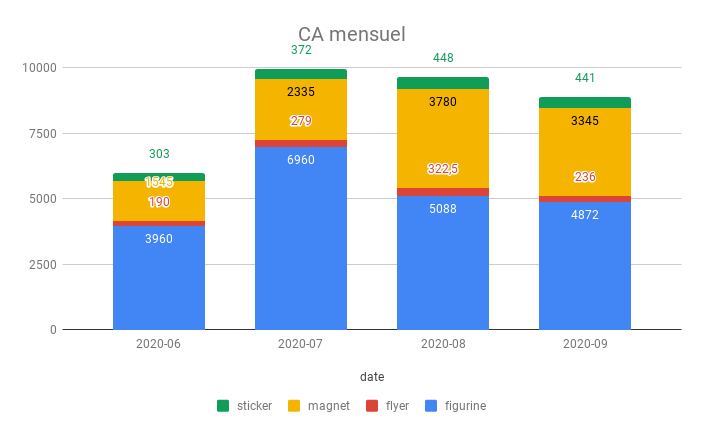

In [ ]:
from IPython.display import Image

Image(filename='/content/drive/My Drive/CA mensuel.png')

#NUMPY
Exécute le code suivant, puis réponds aux questions.

La matrice contient 12 colonnes correspondant chacune à un mois de l'année, et 31 lignes. Attention, certaines lignes ont des valeurs nulles pour les mois de 28 et 30 jours.

In [ ]:
# Exécute le code ci-dessous sans rien modifier
import numpy as np
import pandas as pd
temperatures_df = pd.read_csv("https://raw.githubusercontent.com/murpi/wilddata/master/temp2019.csv", skiprows = 3)
temperatures_df['jour'] = temperatures_df['DATE'].apply(lambda x: x[8:10])
temperatures_df['mois'] = temperatures_df['DATE'].apply(lambda x: x[5:7])
temperatures_array = temperatures_df.pivot_table(values = 'MAX_TEMPERATURE_C', index = 'jour' , columns='mois').to_numpy()
print("C'est chargé, ta matrice numpy est disponible sous le nom de variable : temperatures_array")
df = temperatures_df


C'est chargé, ta matrice numpy est disponible sous le nom de variable : temperatures_array


Questions

In [ ]:
# Affiche un array numpy à partir de l'array "temperatures_array", 
# avec le nombre de jours par mois où la température a été inférieure à 10 degrés.*
np.sum(temperatures_array<10, axis=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until


array([23,  4,  0,  1,  0,  0,  0,  0,  0,  0,  7,  7])

In [ ]:
# Idem avec la température entre 12 et 20 degrés
#print(np.count_nonzero((temperatures_array>=12) & (temperatures_array<=20), axis=0))
np.sum((temperatures_array>=12) & (temperatures_array<=20), axis=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater_equal
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less_equal
  after removing the cwd from sys.path.


array([ 0, 18, 22, 21, 27, 17,  0,  2, 10, 30, 13, 12])

In [ ]:
# Au total sur l'année, combien y a-t-il eu de jours où la température était supérieure à 20 degrés ?
np.sum(temperatures_array>20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


101

In [ ]:
# Quelle a été la température moyenne du mois de mars ?

#I realized after the livecoding that this was not the good way, better to take the slice and then the mean
np.mean(temperatures_array, axis=1)[2]

16.166666666666668

In [ ]:
# Quelle a été la température minimale du mois de juin ?
np.nanmin(temperatures_array, axis=0, )[5]


15.0

# POO

**Programmation orientée objet**

Il t'est demandé de créer une nouvelle classe "sentence" qui va hériter de l'ensemble des méthodes de la classe "str" (*les chaines de caractères que tu connais bien en python*).

Tu devras ajouter une méthode .clean() qui nettoyera les espaces en début et en fin de chaine, mettra en majuscule le premier caractère, et tous les autres caractères en minuscule, et ajoutera un point "." à la fin.

Tu montreras le résultats en appliquant la méthode à la phrase ci-dessous.




In [ ]:
# Tu mettras création de ta classe ici :
class sentence(str):
  def __init__(self, string):
    super().__init__()
  
  def clean(self):
    self = self.strip()
    self = [val.lower() for val in self]
    self[0] = self[0].upper()
    self += '.'
    return ''.join(self)


# Ce code permettra de tester :
variable = " bonjour, AUJourd'hui c'EST le cheCKpoint   "
test = sentence(variable)
test.clean()


"Bonjour, aujourd'hui c'est le checkpoint."

# Python et algorithmie

Ecris une fonction *monnaie_a_rendre()* qui prend deux arguments obligatoires : 
- montant de l'achat : float, supérieur à 0
- monnaie du client : integer, supérieur à 0

La fonction devra retourner la monnaie à rendre au client en un minimum de billets/pièces. 

Attention, si la monnaie du client est insuffisante (inférieure à l'achat), il faudra l'indiquer.

Exemple : 


```
monnaie_a_rendre(26.57 , 40)
>>> Nb billets 10 euros : 1
>>> Nb pièces 2 euros : 1
>>> Nb pièces 1 euro : 1
>>> Nb pièces 20 cents : 2
>>> Nb pièces 2 cents : 1
>>> Nb pièces 1 cent : 1
```



In [ ]:
# Ta fonction ici :
def monnaie_a_rendre(cost, money):
  if money < cost:
    print('insufficent funds')
  elif money == cost:
    print('no change')
  else:
    change = cost-money
  
  change = change*-1
  change_given_paper = []
  change_given_coins = []
  notes = [500.0, 200.0, 100.0, 50.0, 20.0, 10.0, 5.0]
  for i in range(len(notes)):
    while change >= notes[i]:
      change_given_paper.append(notes[i])
      change = change-notes[i]
  change = round(change,2)
  coins = [2.0, 1.0, .5, .1, .05, .02, .01]
  for i in range(len(coins)):
    while change >= coins[i]:
      change_given_coins.append(coins[i])
      change -= coins[i]
  
  counts_paper = []
  for val in change_given_paper:
    counts_paper.append((val, change_given_paper.count(val))) 
  counts_coins = []
  for val in change_given_coins:
    counts_coins.append((val, change_given_coins.count(val))) 


  [print(f"Nb billets {val[0]} : {val[1]}") for val in sorted(set(counts_paper))]
  [print(f"Nb cents {val[0]} : {val[1]}") for val in sorted(set(counts_coins))]


monnaie_a_rendre(26.57 , 40)


Nb billets 10.0 : 1
Nb cents 0.01 : 1
Nb cents 0.02 : 1
Nb cents 0.1 : 4
Nb cents 1.0 : 1
Nb cents 2.0 : 1
